This notebook is heavily adapted from https://huggingface.co/learn/deep-rl-course/unit1/hands-on and https://huggingface.co/learn/deep-rl-course/unit8/hands-on-cleanrl

In [1]:
!apt install -qq swig cmake
!pip install -q stable-baselines3==2.0.0a5
!pip install -q swig
!pip install -q gymnasium[box2d]
!pip install -q huggingface_sb3

cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Selecting previously unselected package swig4.0.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubuntu1_all.deb ...
Unpacking swig (4.0.2-1ubuntu1) ...
Setting up swig4.0 (4.0.2-1ubuntu1) ...
Setting up swig (4.0.2-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 12.1 MB/

In [2]:
import gymnasium as gym
import os

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [28]:
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ 60.101833   -37.76771      0.08892733  -4.065431    -0.08419198
  -0.53957385   0.26161695   0.7987497 ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


## Create the Model
- We are using an existing Deep RL library to set up the [PPO algorithm](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D) and model, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

Stable-Baselines3 is easy to set up:

1️⃣ You **create your environment** (in our case it was done above)

2️⃣ You define the **model you want to use and instantiate this model** `model = PPO("MlpPolicy")`

3️⃣ You **train the agent** with `model.learn` and define the number of training timesteps

```
# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
```



In [ ]:
# Wrap the environment
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

ppo_model = PPO(
    policy = 'MlpPolicy',
    env = env,
    learning_rate=3e-4,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    seed=42)

ppo_model.learn(total_timesteps=2e6, log_interval=100, progress_bar=True)
# Save the model
model_name = "ppo-LunarLander-v2"
ppo_model.save(model_name)

Using cuda device
Wrapping the env in a DummyVecEnv.


Output()

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 512         |
|    ep_rew_mean          | -2.79       |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 100         |
|    time_elapsed         | 224         |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.002388524 |
|    clip_fraction        | 0.000977    |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.658       |
|    learning_rate        | 0.0003      |
|    loss                 | 130         |
|    n_updates            | 396         |
|    policy_gradient_loss | -0.00174    |
|    value_loss           | 482         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 671   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


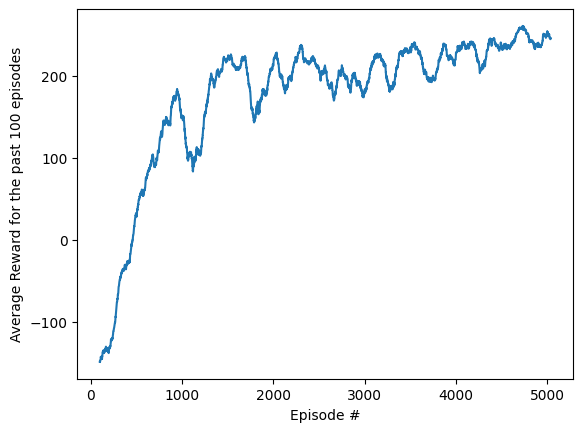

In [ ]:
episode_rew_ppo = env.get_episode_rewards()
episode_rew_ppo_ma = (np.convolve(episode_rew_ppo, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_rew_ppo)+1), episode_rew_ppo_ma)
plt.ylabel('Average Reward for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

#TODO compare with dqn: x-axis is the number of gradient update steps
# reward ; computational time

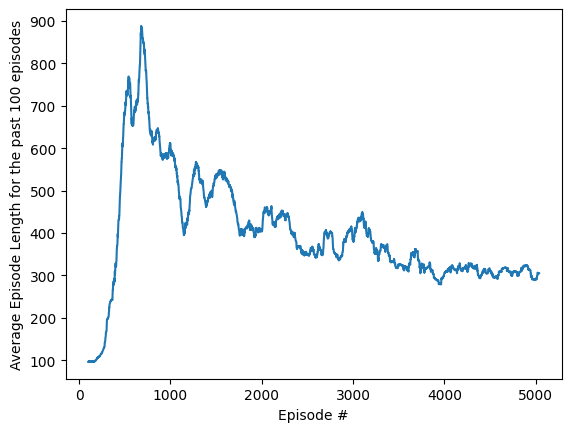

In [ ]:
episode_len_ppo = env.get_episode_lengths()
episode_len_ppo_ma = (np.convolve(episode_len_ppo, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_len_ppo)+1), episode_len_ppo_ma)
plt.ylabel('Average Episode Length for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# Evaluate the final agent
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(ppo_model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=224.21 +/- 102.38347487977953


In [ ]:
import glob
import io
import base64
from IPython import display
from IPython.display import HTML
from gym.wrappers.monitoring import video_recorder
import torch

def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(agent, env_name):
    env = gym.make(env_name, render_mode='rgb_array')
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    state, _ = env.reset()
    done, truncated = False, False
    reward_list = []
    while not done and not truncated:
        frame = env.render()

        vid.capture_frame()
        # import pdb; pdb.set_trace()
        action = agent.predict(state)

        state, reward, done, truncated, _ = env.step(action[0])
        reward_list.append(reward)
    vid.close()
    env.close()
    print(np.array(reward_list).sum())

In [ ]:
!mkdir video

In [ ]:
saved_model = PPO.load("./ppo-LunarLander-v2.zip")

show_video_of_model(saved_model, "LunarLander-v2")

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


267.09903270469346


In [ ]:
show_video("LunarLander-v2")

## Comparing PPO and DQN

In [ ]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make("LunarLander-v2")
env.reset()
env = Monitor(env, log_dir)

dqn_model = DQN(policy = 'MlpPolicy',
    env = env,
    learning_rate = 3e-4, # default of PPO
    learning_starts = 10000,
    buffer_size = 50000,
    target_update_interval = 5000,
    batch_size = 64,
    gamma = 0.999,
    seed=42,
    verbose=1)

dqn_model.learn(total_timesteps=2e6, log_interval=100, progress_bar=True)
# Save the model
model_name = "dqn-LunarLander-v2"
dqn_model.save(model_name)

Using cuda device
Wrapping the env in a DummyVecEnv.


Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94       |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.955    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 4815     |
|    time_elapsed     | 1        |
|    total_timesteps  | 9401     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.6     |
|    ep_rew_mean      | -160     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 1259     |
|    time_elapsed     | 15       |
|    total_timesteps  | 18963    |
| train/              |          |
|    learning_rate    | 0.0003   |
|    loss             | 5.07     |
|    n_updates        | 2240     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

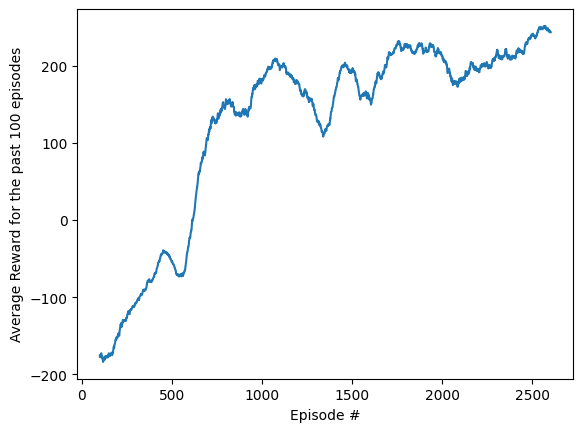

In [ ]:
episode_rew_dqn = env.get_episode_rewards()
episode_rew_dqn_ma = (np.convolve(episode_rew_dqn, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_rew_dqn)+1), episode_rew_dqn_ma)
plt.ylabel('Average Reward for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

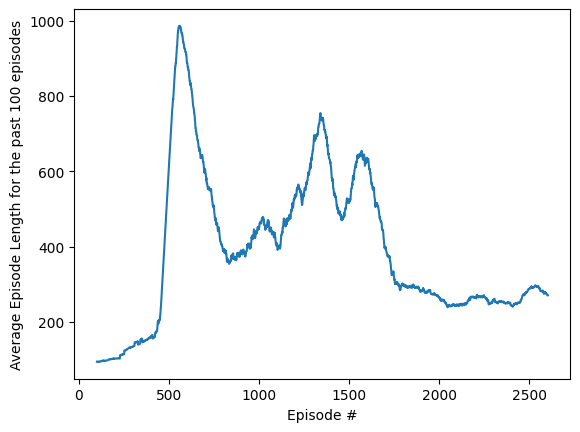

In [ ]:
episode_len_dqn = env.get_episode_lengths()
episode_len_dqn_ma = (np.convolve(episode_len_dqn, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_len_dqn)+1), episode_len_dqn_ma)
plt.ylabel('Average Episode Length for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

In [7]:
with open("results.npy", "rb") as f:
    episode_rew_ppo = np.load(f)
    episode_len_ppo = np.load(f)
    episode_rew_dqn = np.load(f)
    episode_len_dqn = np.load(f)

episode_rew_ppo_ma = (np.convolve(episode_rew_ppo, np.ones(100), "valid") / 100)
episode_len_ppo_ma = (np.convolve(episode_len_ppo, np.ones(100), "valid") / 100)
episode_rew_dqn_ma = (np.convolve(episode_rew_dqn, np.ones(100), "valid") / 100)
episode_len_dqn_ma = (np.convolve(episode_len_dqn, np.ones(100), "valid") / 100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


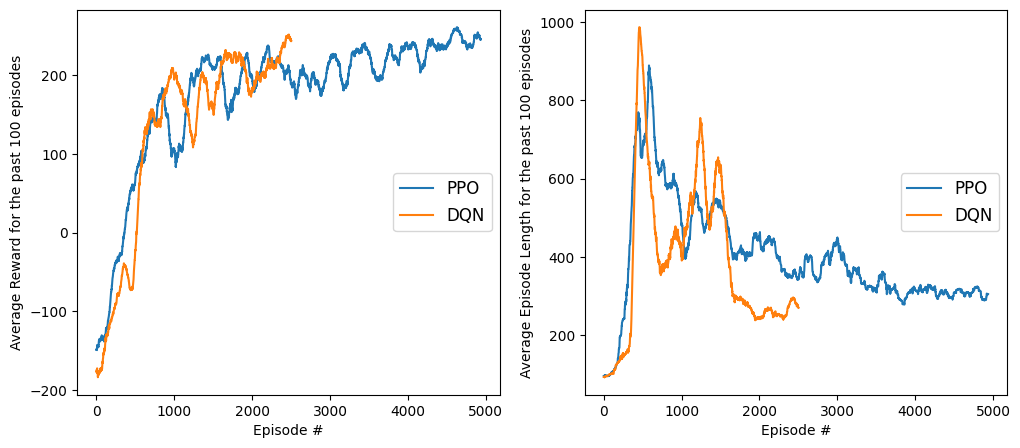

In [27]:
# Avg Reward vs Episode num

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(np.arange(len(episode_rew_ppo_ma)), episode_rew_ppo_ma, label="PPO")
ax[0].plot(np.arange(len(episode_rew_dqn_ma)), episode_rew_dqn_ma, label="DQN")
legend = ax[0].legend(loc='center right', fontsize='large')
ax[0].set(ylabel='Average Reward for the past 100 episodes', xlabel="Episode #")

ax[1].plot(np.arange(len(episode_len_ppo_ma)), episode_len_ppo_ma, label="PPO")
ax[1].plot(np.arange(len(episode_len_dqn_ma)), episode_len_dqn_ma, label="DQN")
legend = ax[1].legend(loc='center right', fontsize='large')
ax[1].set(ylabel='Average Episode Length for the past 100 episodes', xlabel="Episode #")

plt.show()

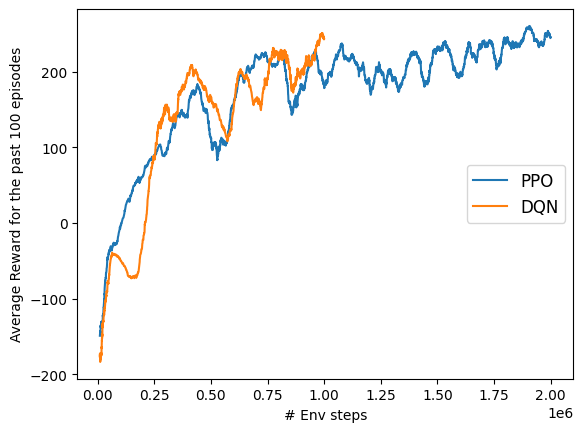

In [60]:
# Avg Reward vs Env steps

plt.plot(np.cumsum(episode_len_ppo)[99:], episode_rew_ppo_ma, label="PPO")
plt.plot(np.cumsum(episode_len_dqn)[99:], episode_rew_dqn_ma, label="DQN")
plt.legend(loc='center right', fontsize='large')
plt.xlabel("# Env steps")
plt.ylabel("Average Reward for the past 100 episodes")
plt.show()

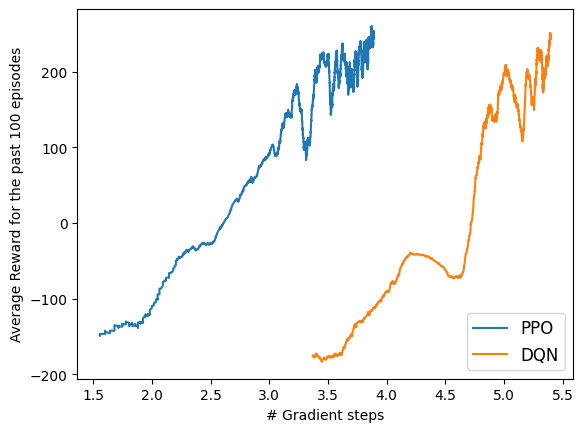

In [65]:
# Avg Reward vs Gradient steps (log scale)
grad_step_ppo = np.floor_divide(np.cumsum(episode_len_ppo)[99:], 1024) * 4
grad_step_dqn = np.floor_divide(np.cumsum(episode_len_dqn)[99:], 4)

log_grad_step_ppo = np.log10(grad_step_ppo)
log_grad_step_dqn = np.log10(grad_step_dqn)

plt.plot(log_grad_step_ppo, episode_rew_ppo_ma, label="PPO")
plt.plot(log_grad_step_dqn, episode_rew_dqn_ma, label="DQN")
plt.legend(loc='lower right', fontsize='large')
plt.xlabel("# Gradient steps")
plt.ylabel("Average Reward for the past 100 episodes")
plt.show()